## Import Dependencies and Data

In [1]:
# Bringing in tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))
print("GPUs: ", gpus)

Num GPUs Available:  1
GPUs:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt


c:\Users\bhavy\miniconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
ds = tfds.load('fashion_mnist', split='train')

In [5]:
ds.as_numpy_iterator().next().keys() # shows the format of the data

dict_keys(['image', 'label'])

## Building the Data Pipeline and Visualizing the Data

In [6]:
import numpy as np

In [7]:
# Setup connection aka iterator
dataiterator = ds.as_numpy_iterator() # creates an iterator object , it will go through the dataset one by one

In [8]:
dataiterator.next()['image'] 

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

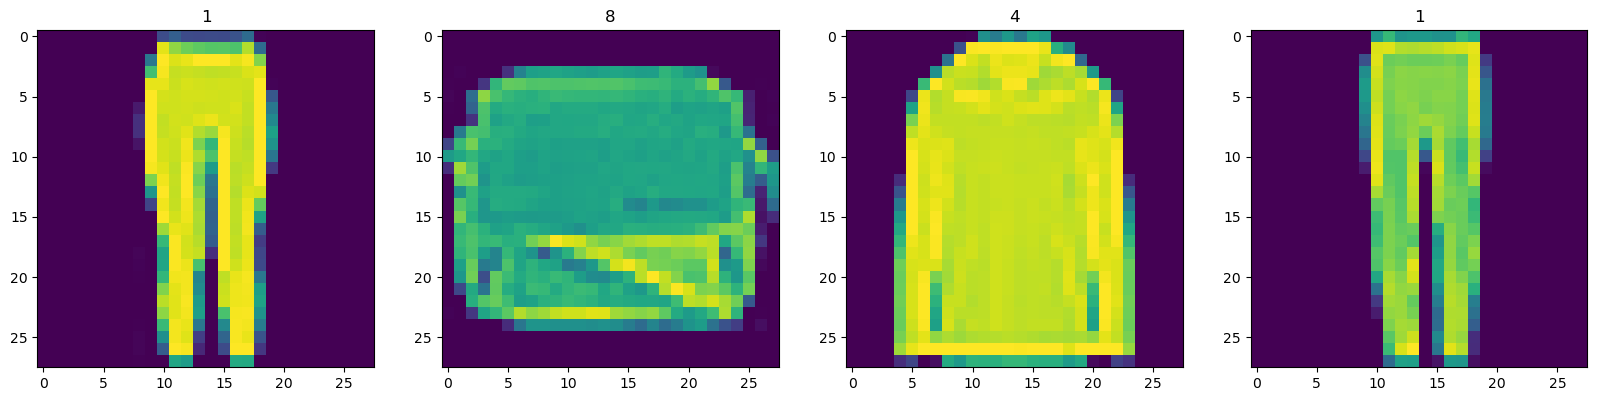

In [9]:
# Setup the subplot formatting 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get four images
for idx in range(4):  
    # Grab an image and label
    sample = dataiterator.next() # gets the next image in the dataset
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(sample['image'])) # it removes single-dimensional entries from the shape of an array i.e it converts (28,28,1) to (28,28)
    # Appending the image label as the plot title 
    ax[idx].title.set_text(sample['label']) # the label is a number from 0-9 representing the type of clothing

In [10]:
# Scale and return images only 
def scale_images(data): 
    image = data['image'] # grabs the image only
    return image / 255 # scales the image to be between 0 and 1 as oposed to 0-255